<a href="https://colab.research.google.com/github/earo12/Stock-Market-Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis






In this project we're going to Analyse and predict some data for companies like Apple, Google, Microsoft and Amazon as well.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

In [ ]:
tec_lis = ['AAPL', 'GOOG', 'MSFT' , 'AMZN']
tec_lis = ['AAPL', 'GOOG', 'MSFT' , 'AMZN']
end = datetime.now()
start = datetime(end.year - 1 , end.month , end.day)

In [ ]:
for variable in tec_lis:
  globals()[variable] = yf.download(variable, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
com_lis = [AAPL, GOOG, MSFT, AMZN]
com_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
for company, com_name in zip(com_lis, com_name):
  company['com_name'] = com_name
df = pd.concat(com_lis, axis = 0)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,com_name
Date,,,,,,,
2023-04-06,100.750000,102.379997,99.800003,102.059998,102.059998,43808000,AMAZON
2023-04-10,100.959999,102.199997,99.570000,102.169998,102.169998,37261200,AMAZON
2023-04-11,100.800003,101.000000,99.010002,99.919998,99.919998,60417800,AMAZON
2023-04-12,100.400002,100.510002,97.709999,97.830002,97.830002,56735000,AMAZON
2023-04-13,98.949997,102.570000,98.709999,102.400002,102.400002,67925100,AMAZON
2023-04-14,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,AMAZON
2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,AMAZON
2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500,AMAZON
2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58284900,AMAZON


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,149.342699,151.386825,147.500278,149.534682,149.143699,7.990326e+07
std,10.712320,10.583106,10.823193,10.738921,10.715861,2.498087e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,1.935756e+07
25%,142.120003,143.987495,139.974998,142.472496,141.981445,6.419375e+07
50%,148.884995,150.930000,147.264999,149.375000,148.933762,7.486430e+07
75%,156.512501,158.277496,154.204994,156.792496,155.910637,8.900328e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-04-20 to 2023-04-20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
 6   com_name   252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


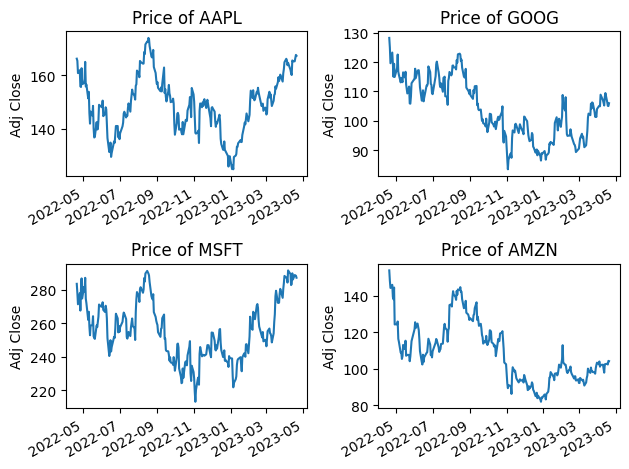

In [ ]:
for j, comp in enumerate(com_lis, 1):
  plt.subplot(2,2,j)
  comp['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f'Price of {tec_lis[j-1]}')
plt.tight_layout()
plt.show()


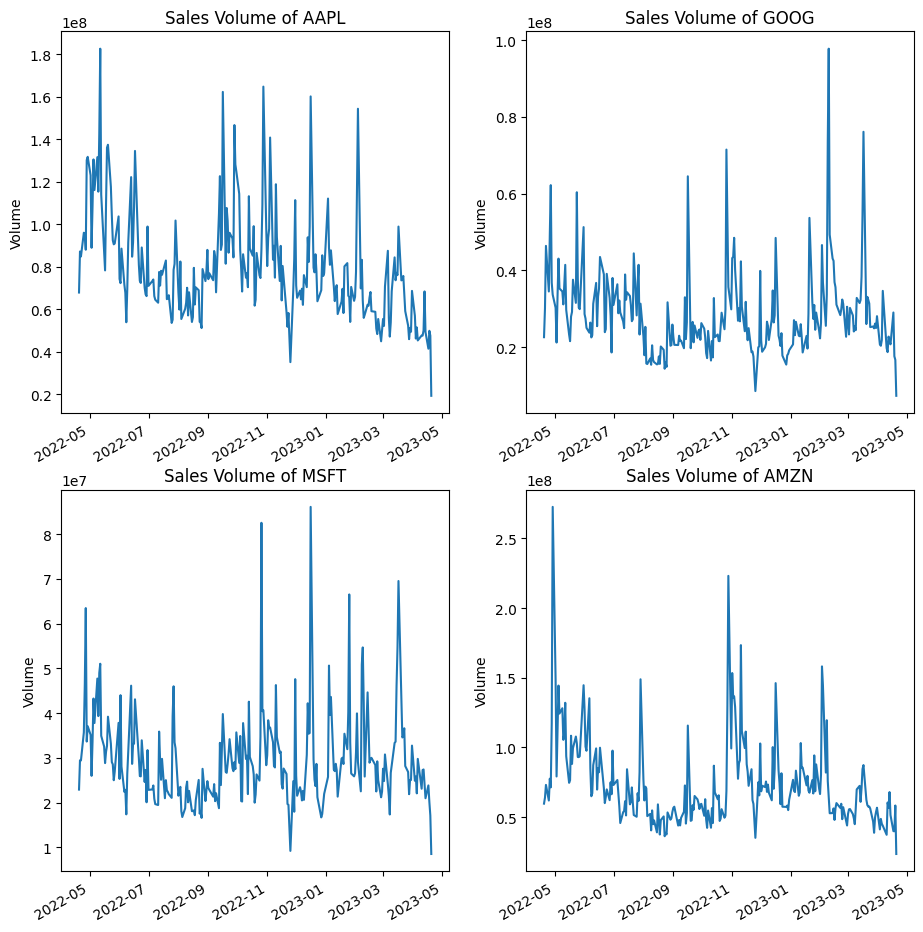

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (11,8))
plt.subplots_adjust(top = 1.25, bottom = 1.2)
for j, comp in enumerate(com_lis, 1):
  plt.subplot(2,2,j)
  comp['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f'Sales Volume of {tec_lis[j-1]}')
plt.show()
plt.tight_layout()

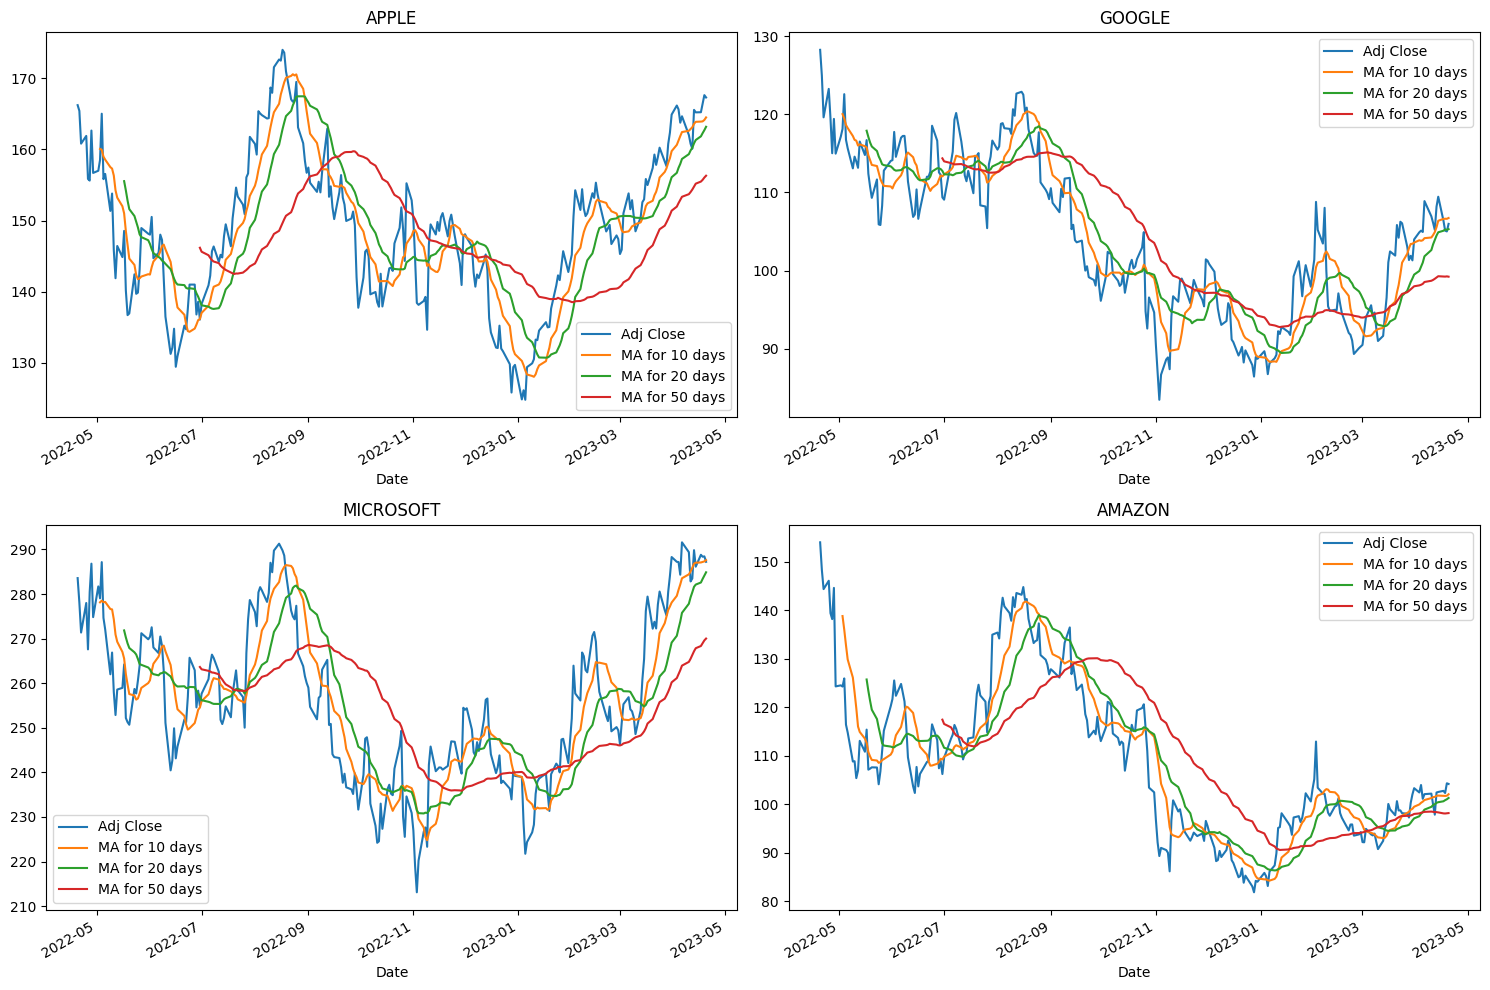

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in com_lis:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


fig.tight_layout()

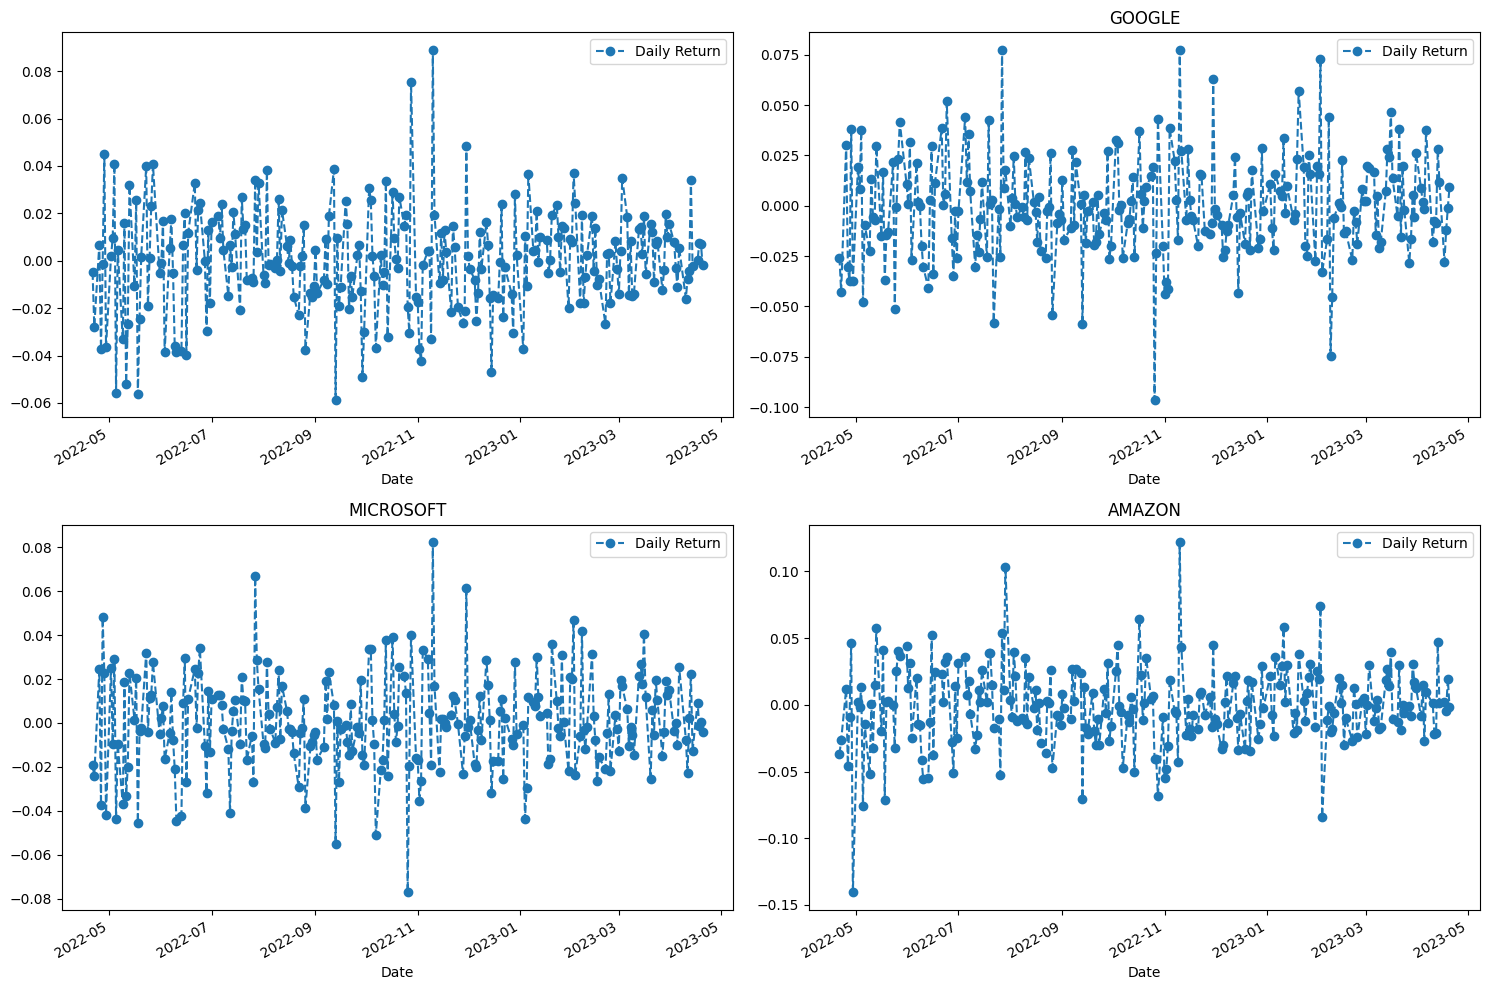

In [ ]:
for company in com_lis:
    company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker ='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


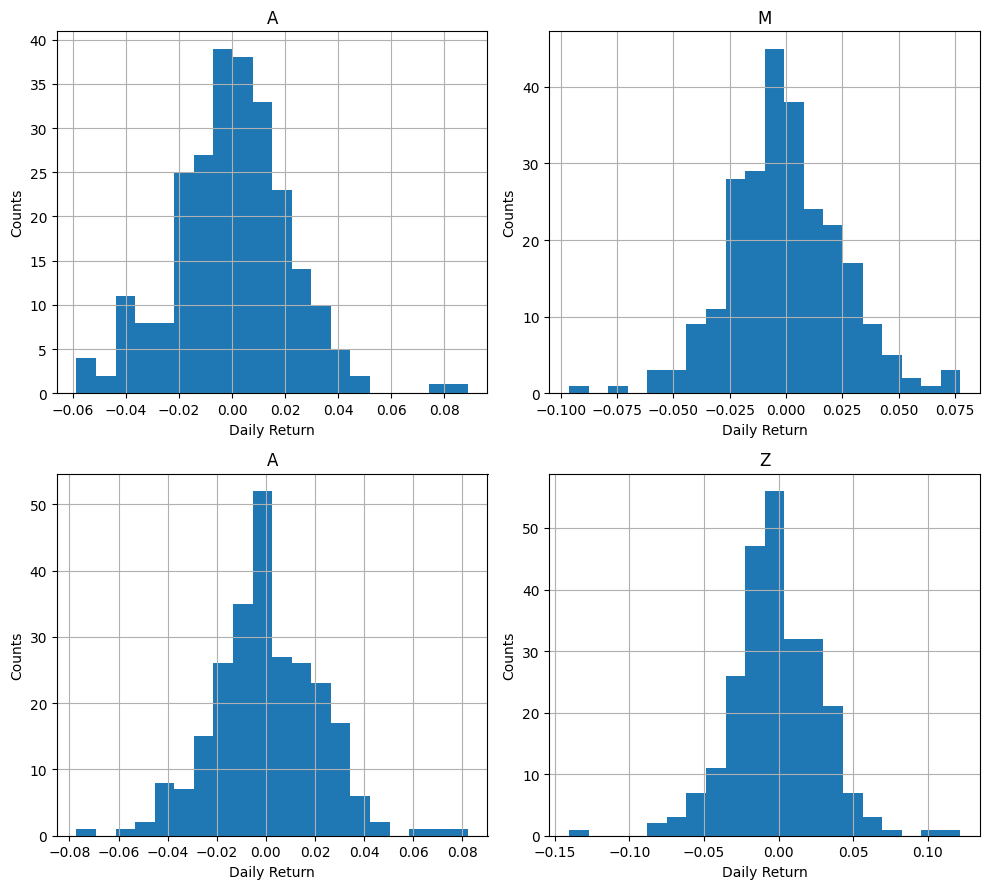

In [ ]:
#histogram

plt.figure(figsize = (10,9))
for i, c in enumerate(com_lis, 1):
  plt.subplot(2,2,i) 
  c['Daily Return'].hist(bins = 20)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{com_name[i-1]}')
plt.tight_layout()

In [ ]:
closing_df = pdr.get_data_yahoo(tec_lis, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

TypeError: ignored